In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #string text to nnumber
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.simplefilter('ignore')

C:\Users\ratna\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
df.shape

(5574, 2)

In [5]:
df['label'].value_counts()

0    4827
1     747
Name: label, dtype: int64

In [6]:
x = df.sms
y = df.label

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [8]:
x_train

226     Would really appreciate if you call me. Just n...
3359    I don't run away frm u... I walk slowly &amp; ...
3483    Do you want a NEW video phone750 anytime any n...
3173    Do u still have plumbers tape and a wrench we ...
919     Hey you gave them your photo when you register...
                              ...                        
1607        Ok no prob... I'll come after lunch then...\n
3915    Today is ACCEPT DAY..U Accept me as? Brother S...
1428    THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...
4367    Mm yes dear look how i am hugging you both. :-P\n
2522                             Sorry, I'll call later\n
Name: sms, Length: 4459, dtype: object

In [9]:
v = CountVectorizer()
x_train_converted = v.fit_transform(x_train)

In [10]:
x_train_converted.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
mb = MultinomialNB()

mb.fit(x_train_converted,y_train)

MultinomialNB()

In [12]:
mb.score(v.transform(x_test),y_test)

0.9874439461883409

In [13]:
y_pred = mb.predict(v.transform(x_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.97      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



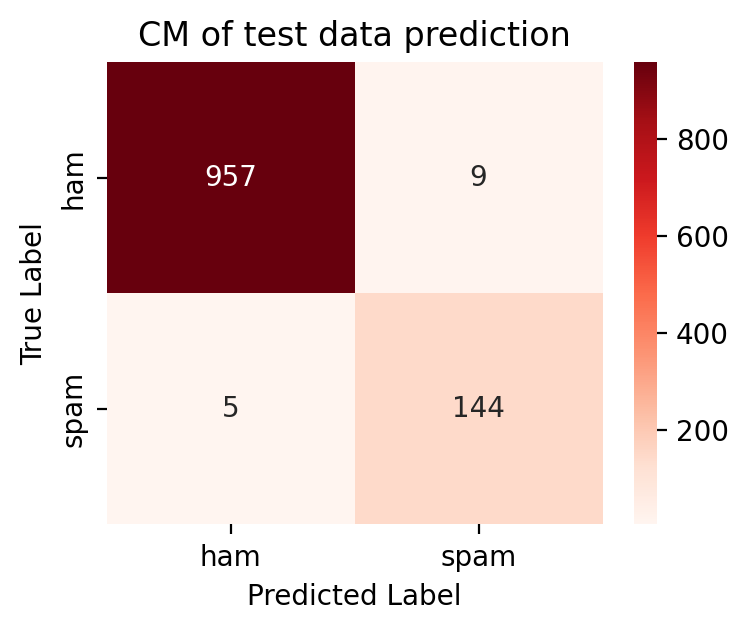

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('CM of test data prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
sms = [
    "We have a meeting tommorow be availble",
    "YOu have won a lottery ticket, you would get a reward , a 20% discount"
    ]

In [16]:
v.transform(sms)

<2x7739 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [17]:
cov_sms = v.transform(sms)

In [18]:
mb.predict(cov_sms)

array([0, 1], dtype=int64)

In [19]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [20]:
lg.fit(x_train_converted,y_train)

LogisticRegression()

In [21]:
lg.score(v.transform(x_test),y_test)

0.989237668161435

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [23]:
dt.fit(x_train_converted,y_train)

DecisionTreeClassifier()

In [24]:
dt.score(v.transform(x_test),y_test)

0.9730941704035875

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_converted,y_train)
rf.score(v.transform(x_test),y_test)

0.9775784753363229